In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #绘制3D图案
from SALib.sample import saltelli
from SALib.analyze import sobol
sample_points_2_index = 6 #采样点，2^n个point
single_dim_number = 50

In [2]:
problem = {
    'num_vars':3,
    'names':['kexi','yita','Q_star'],
    'bounds':[[0.08, 0.12],
              [80.0, 120.0],
              [4, 6],]
}

def parabola(x0,x1,kexi,yita,Q_star):
    return 0.5*kexi*x0**2+0.5*yita*(1.0/x1 - 1.0/Q_star)**2

In [3]:
param_values = saltelli.sample(problem,2**sample_points_2_index)

C:\Users\12550\AppData\Local\Temp/ipykernel_36984/3729860971.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem,2**sample_points_2_index)


In [4]:
x = np.linspace(0.1,32,single_dim_number)
y = np.linspace(0.1,32,single_dim_number)

In [5]:

kong  = np.array([parabola(x[0],y,*params) for params in param_values])
for i in range(single_dim_number-1):
    j = i + 1
    text = np.array([parabola(x[j],y,*params) for params in param_values])
    kong = np.append(kong, text, axis=1)

#text = np.array([parabola(x,y,*params) for params in param_values])
kong,kong.shape,np.mean(kong,axis=0).shape

(array([[4628.29996404,   63.90733381,   13.77961275, ...,   42.44451093,
           42.45392467,   42.46299664],
        [4628.30012654,   63.90749631,   13.77977525, ...,   59.08451093,
           59.09392467,   59.10299664],
        [5110.72858261,   70.56864238,   15.215882  , ...,   42.54921565,
           42.55961063,   42.56962821],
        ...,
        [5102.47301708,   66.53549756,   13.27820424, ...,   55.67465051,
           55.6877569 ,   55.70037583],
        [4761.13906826,   63.89824862,   13.26670664, ...,   55.23830906,
           55.24926474,   55.25981726],
        [4743.35471863,   61.85268435,   12.34370493, ...,   55.55115605,
           55.56333999,   55.57507079]]),
 (512, 2500),
 (2500,))

In [6]:
sobol_indices = [sobol.analyze(problem,Y) for Y in kong.T]
len(sobol_indices) # 这里sobol_indices是一个列表

2500

In [7]:
# sub = fig.add_subplot( projection='3d')# 添加子图，
# surf = sub.plot_surface(x_, y_, z_, cmap=plt.cm.brg) #绘制曲面,cmap=plt.cm.brg并设置颜色cmap
# cb = fig.colorbar(surf, shrink=0.8, aspect=15) #设置颜色棒
 
# sub.set_xlabel(r"x axis")
# sub.set_ylabel(r"y axis")
# sub.set_zlabel(r"z axis")

In [8]:
def drawing(fig,i,str0,str1,str2):
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(x,y,S1s[:,:,i], cmap=plt.cm.brg) #绘制曲面,cmap=plt.cm.brg并设置颜色cmap
    cb = fig.colorbar(surf, shrink=0.8, aspect=15) #设置颜色棒
    ax.set_xlabel(str0)
    ax.set_ylabel(str1)
    ax.set_zlabel(str2)
    plt.savefig("APF Sensitivity Analysis_"+str(i)+".svg", dpi=300,format="svg")  # 注意这个必须放在show之前！！不然svg只有2kb，啥也没有
    plt.show()
    
    

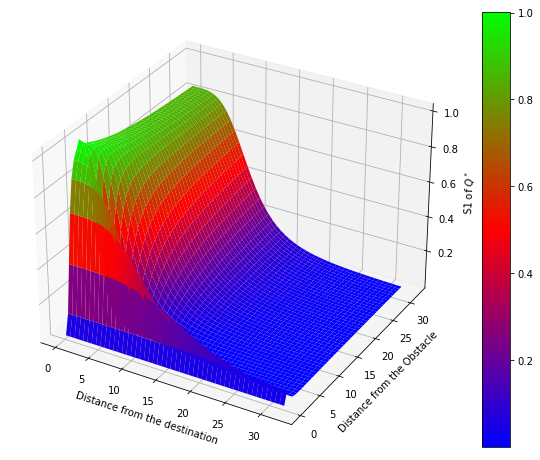

In [9]:
# 提取100个a,b一阶指数
S1s = np.array([s['S1'] for s in sobol_indices])
S1s = S1s.reshape(single_dim_number,single_dim_number,3) # 为绘制3D图作准备

fig0 = plt.figure(figsize=(10,10),facecolor='white')
# fig1 = plt.figure(figsize=(10,10),facecolor='white')
# fig2 = plt.figure(figsize=(10,10),facecolor='white')
x, y = np.meshgrid(x,y,indexing='ij')
# drawing(fig0,0,"Distance from the destination","Distance from the Obstacle","S1 of $\zeta$")
# drawing(fig0,1,"Distance from the destination","Distance from the Obstacle","S1 of $\eta$")
drawing(fig0,2,"Distance from the destination","Distance from the Obstacle","S1 of $Q^*$")

# drawing(fig1,1)
# drawing(fig2,2)

# gs = fig.add_gridspec(2,2)

# ax1 = fig.add_subplot(gs[0,1],projection='3d')
# ax2 = fig.add_subplot(gs[1,1],projection='3d')
# surf = [None] * 4
# x = np.linspace(0.1,32,single_dim_number**2)
# for i,ax in enumerate([ax1,ax2]):
#     ax.plot(x,y,S1s[:,:,i],
#            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
#            color = 'black')
#     surf[i] = ax.plot_surface(x,y,S1s[:,:,i], cmap=plt.cm.brg) #绘制曲面,cmap=plt.cm.brg并设置颜色cmap
#     cb = fig.colorbar(surf[i], shrink=0.8, aspect=15) #设置颜色棒
#     ax.set_xlabel(r"x axis")
#     ax.set_ylabel(r"y axis")
#     ax.set_zlabel(r"z axis")
#     ax.set_xlabel('x')
#     ax.set_ylabel('First-order Sobol index')
#     ax.set_ylim(0,1.04)
#     ax.yaxis.set_label_position("right")
#     ax.yaxis.tick_right()
#     ax.legend(loc='upper right')
# x = np.linspace(0.1,32,single_dim_number**2)
# kong = np.mean(kong,axis=0)
# kong = kong.reshape(single_dim_number,single_dim_number)
# surf[3] = ax0.plot_surface(x,y,kong, cmap=plt.cm.brg) #绘制曲面,cmap=plt.cm.brg并设置颜色cmap
# cb = fig.colorbar(surf[i], shrink=0.8, aspect=15) #设置颜色棒
# ax.set_xlabel(r"x axis")
# ax.set_ylabel(r"y axis")
# ax.set_zlabel(r"z axis")
# ax0.plot(x,np.mean(kong,axis=0),label="Mean", color='black')
# prediction_interval = 95
# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")
# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"

# plt.show()
# plt.savefig("APF_Sensitiv.svg", dpi=300,format="svg")

In [10]:
# S1s = np.array([s['S1'] for s in sobol_indices])
# S1s = S1s.reshape(single_dim_number,single_dim_number,3)
# S1s.shape,S1s[:,:,0].shape